## SVC

In [50]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing

In [15]:
iris = sklearn.datasets.load_iris()
iris.data[:3], iris.target[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]), array([0, 0, 0]))

In [31]:
labelencoder = sklearn.preprocessing.OneHotEncoder()
Y_labeled = labelencoder.fit_transform(iris.target.reshape(-1,1)).todense()
Y_labeled[:3]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [60]:

def train_svc(X, Y, C, gamma):
    model = SVC(kernel='rbf', C=C, gamma=gamma)
    model.fit(X, Y)
    return model

# TODO: use exponential size
CC = numpy.linspace(0.1, 1.0, 15)
gammas = numpy.linspace(0.1, 2.0, 15)
res_shape = len(CC), len(gammas)
training_accuracy = numpy.ndarray(res_shape) 
testing_accuracy = numpy.ndarray(res_shape)

#print(iris.data.shape, Y_labeled.shape)

for c_idx, C in enumerate(CC):
    for gamma_idx, gamma in enumerate(gammas):
        trains = []
        tests = []
        for seed in range(0, 100):
            X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=seed)

            model = train_svc(X_train, Y_train, C, gamma)
            Y_pred = model.predict(X_test)
            
            te = sklearn.metrics.accuracy_score(Y_test, Y_pred)
            tr = model.score(X_train, Y_train)

            trains.append(tr)
            tests.append(te)
    
        training_accuracy[c_idx][gamma_idx] = numpy.average(trains)
        testing_accuracy[c_idx][gamma_idx] = numpy.average(tests)
        

Text(0.5,1,'Testing accuracy')

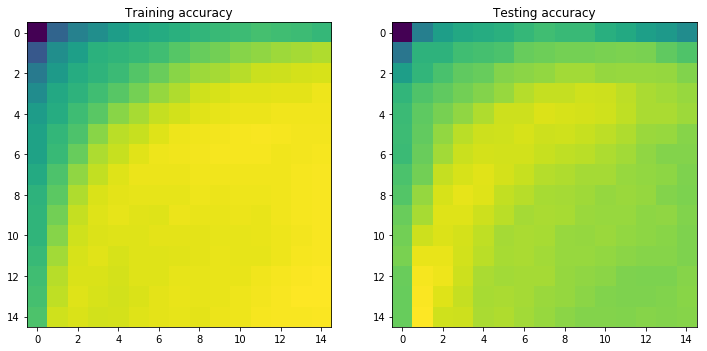

In [64]:
fig, [train_plot, test_plot] = plt.subplots(ncols=2,figsize=(12,12))
train_plot.imshow(training_accuracy)
train_plot.set_title('Training accuracy')
test_plot.imshow(testing_accuracy)
test_plot.set_title('Testing accuracy')

Training accuracy goes up with increasing C and gamma.

Testing accuracy also goes up with increasing C and gamma, until a point, then it starts decreasing again.
This decrease in testing accuracy suggest that the model has been overfitted to the training data.